In [1]:
import numpy as np
import librosa
import scipy.io.wavfile as wav
# Close all figures
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_name = 'input.wav'
# Read input wav file
x, fs = librosa.load(file_name)
t = np.arange(len(x))*(1/fs)
# fs,x=wav.read(file_name)
# x = x/(2**16-1)
# plt.figure()
# plt.plot(t,x)
# plt.xlabel('Time (t)')
# plt.ylabel('Audio')
# plt.title("Speech Sample")
# plt.grid()
# plt.show()

In [3]:
# Add random Gaussian noise
STD_n= 0.01
v=np.random.normal(0, STD_n, x.shape[0])
# plt.figure()
# plt.plot(t,v)
# plt.xlabel('Time (t)')
# plt.ylabel('Noise')
# plt.title("Additive Noise")
# plt.grid()
# plt.show()

In [4]:
# Noisy Speech Signal
orig = x.astype('float64') + v.astype('float64')
noised_signal = orig.copy()
# plt.figure()
# plt.plot(t,noised_signal)
# plt.xlabel('Time (t)')
# plt.ylabel('Audio')
# plt.title("Noised Signal")
# plt.grid()
# plt.show()

In [5]:
# Initialize variables
N = len(x) #length of the input signal

F = np.zeros((5, N)).astype('float64') #initialization of standard transition matrix
I = np.eye(5).astype('float64') 
H = np.zeros((5, N)).astype('float64') #Transformation Matrix 
sig = np.zeros((5, 5*N)).astype('float64') # priori or posteri covariance matrix.
K = np.zeros((5, N)).astype('float64') #kalman gain.
XX = np.zeros((5, N)).astype('float64') #kalman coefficient for yy.
y = np.zeros((N,1)).astype('float64') #desired signal
vv = np.zeros((N,1)).astype('float64') #predicted state error vector
yy = np.zeros((N,1)).astype('float64') #Estimated error sequence

Q = 1e-6 * np.eye(5).astype('float64') #Process Noise Covariance.
R = 0.1 #Measurement Noise Covariance

y[:N,:] = x.astype('float64').reshape((-1,1)) #Measurement Noise Covariance
sig[:5, :5] = 0.1 * I

In [6]:
for k in range(6, N):
    F[0:5, k] = -np.array([y[k-1], y[k-2], y[k-3], y[k-4], y[k-5]]).reshape(F[0:5, k].shape)
    H[0:5, k] = -np.array([yy[k-1], yy[k-2], yy[k-3], yy[k-4], yy[k-5]]).reshape(H[0:5, k].shape)
    K[0:5, k] = sig[0:5, 5*k-30:5*k-25]@F[0:5, k]/(F[0:5, k].T @ sig[0:5, 5*k-30:5*k-25] @ F[0:5, k] + R) # Kalman Gain
    sig[0:5, 5*k-24:5*k-19] = sig[0:5, 5*k-30:5*k-25] - K[0:5, k] @ (F[0:5, k].T @ sig[0:5, 5*k-30:5*k-25]) + Q # error covariance matrix

    XX[0:5, k] = (I - K[0:5, k] @ F[0:5, k].T) @ XX[0:5, k-1] + (K[0:5, k] * y[k]) # posteriori value of estimate X(k)
    orig_k = y[k] - (F[0:3, k].T @ XX[0:3, k]) # estimated speech signal
    yy[k] = (H[0:5, k].T @ XX[0:5, k]) + orig_k # no. of coefficients per iteration
# Calculate mean squared error
Er = orig - x
# print(Er)
MSE_kalman = np.sum(Er ** 2) / len(Er)
MSE_kalman

9.966423345920546e-05

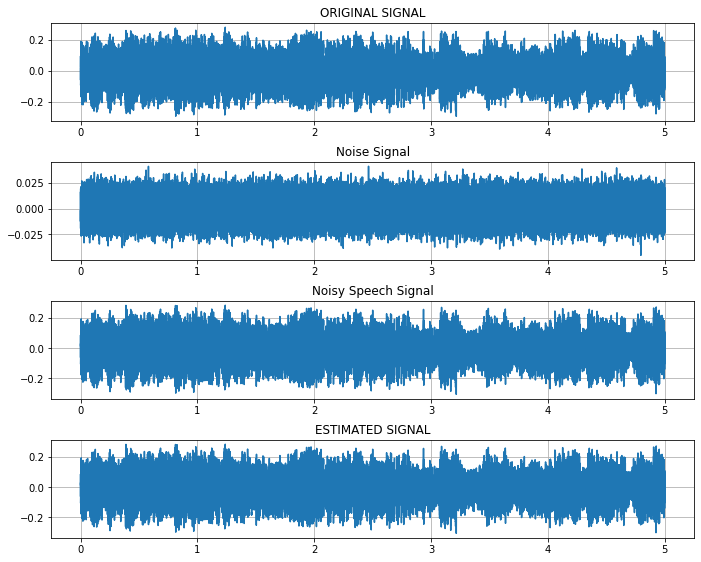

In [15]:

# Plot signals
tt = np.arange(len(x))

fig, axs = plt.subplots(4, 1,figsize=(10,8))
fig.tight_layout(pad=2)

axs[0].plot(t,x)
axs[0].set_title('ORIGINAL SIGNAL')
axs[0].grid()
axs[1].plot(t,v)
axs[1].set_title('Noise Signal')
axs[1].grid()
axs[2].plot(t,noised_signal)
axs[2].set_title('Noisy Speech Signal')
axs[2].grid()
axs[3].plot(t,orig)
axs[3].set_title('ESTIMATED SIGNAL')
axs[3].grid()
plt.show()

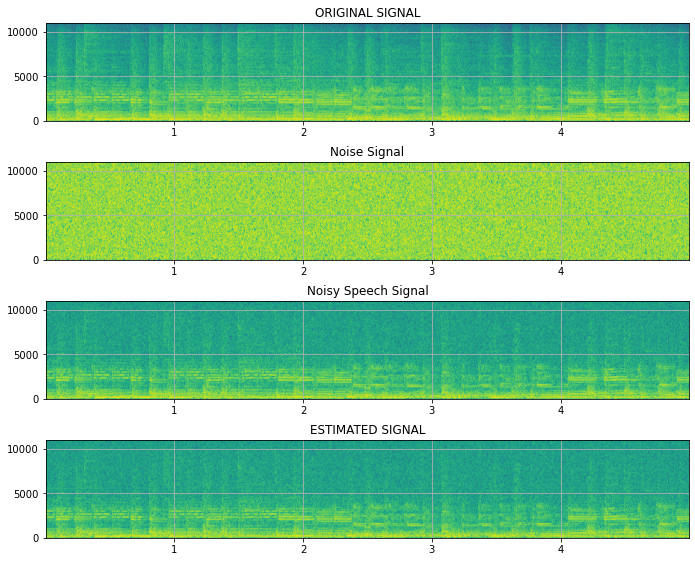

In [16]:

fig, axs = plt.subplots(4, 1,figsize=(10,8))
fig.tight_layout(pad=2)

axs[0].specgram(x,Fs=fs)
axs[0].set_title('ORIGINAL SIGNAL')
axs[0].grid()
axs[1].specgram(v,Fs=fs)
axs[1].set_title('Noise Signal')
axs[1].grid()
axs[2].specgram(noised_signal,Fs=fs)
axs[2].set_title('Noisy Speech Signal')
axs[2].grid()
axs[3].specgram(orig,Fs=fs)
axs[3].set_title('ESTIMATED SIGNAL')
axs[3].grid()
plt.show()

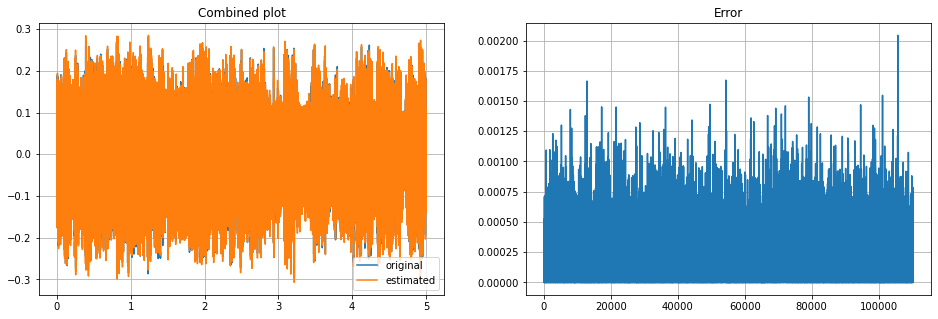

In [24]:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(t, x, t, orig)
plt.title('Combined plot')
plt.legend(['original', 'estimated'])
plt.grid()
plt.subplot(1,2,2)
plt.plot(Er**2)
plt.title('Error')
plt.grid()
plt.show()


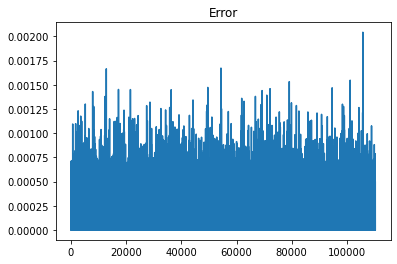

In [19]:
plt.figure()
plt.plot(Er**2)
plt.title('Error')
plt.show()